In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
import mne

In [39]:
import pandas as pd

## Быстрое по одному человеку

In [40]:
def events_to_array(events,raw):
    ev_array=[0]*events[0,0]
    
    for i in range(1,len(events)):
        kek=[events[i-1,2]]*(events[i,0]-events[i-1,0])
        
        
        ev_array=np.concatenate([ev_array,kek])
    
        #print(ev_array.shape)
        
    kek=[events[-1,2]]*(raw.times.shape[0]-events[-1,0])
    
    
    ev_array=np.concatenate([ev_array,kek])
    
    return ev_array


In [32]:
ica=mne.preprocessing.ICA(n_components=0.99,random_state=123)
ica.fit(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by explained variance: 41 components
Fitting ICA took 21.3s.


<ICA | raw data decomposition, fit (fastica): 59040 samples, 41 components, channels used: "eeg">

In [5]:
[2,9]

[2, 9]

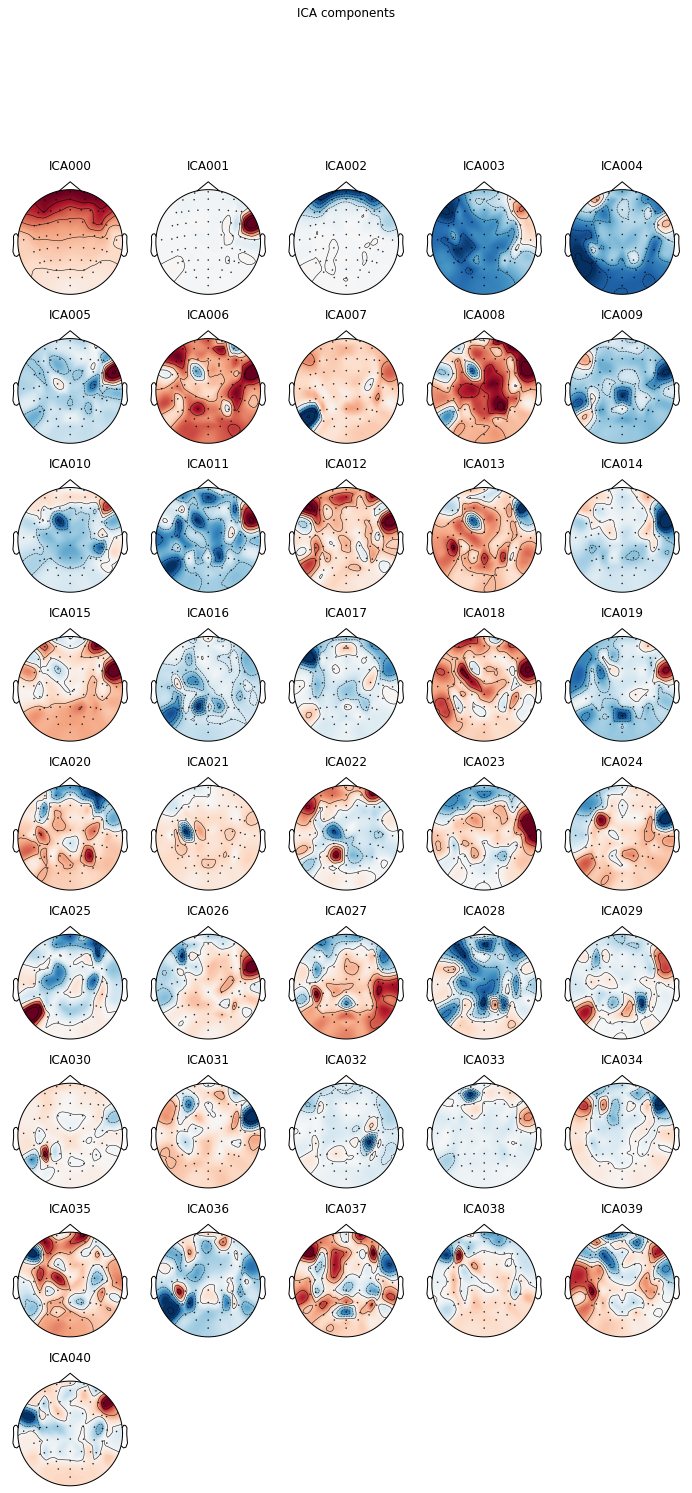

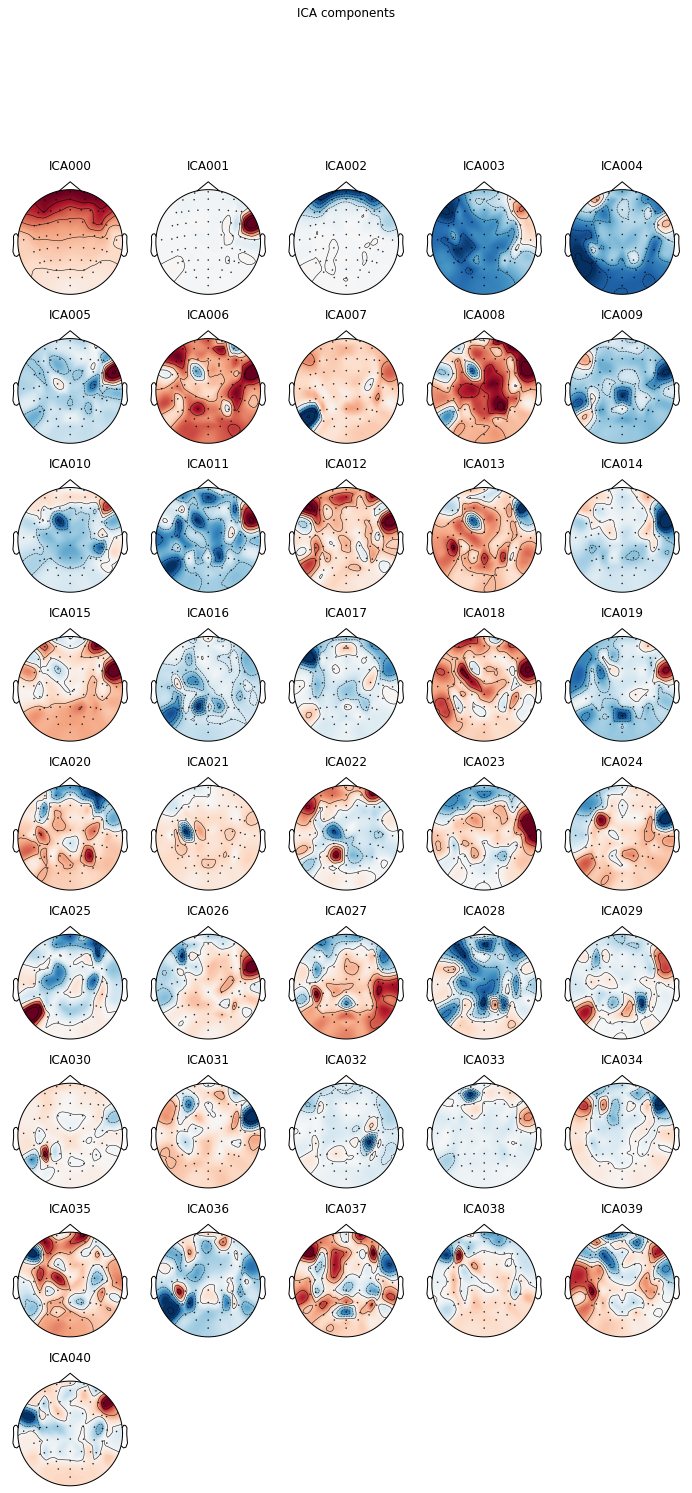

In [33]:
ica.plot_components(np.arange(41))

In [184]:
ica.save('Standard_dataset/S00'+str(i)+'-ica.fif')

Writing ICA solution to Standard_dataset/S003-ica.fif...


<ICA | raw data decomposition, fit (fastica): 60000 samples, 31 components, channels used: "eeg">

In [176]:
d_del={ 1:[0,2,9,12],
        2:[0,1,9],
        3:[0,2,3,6,10,17],
        4:[0,1,2,5,14]
      }


In [26]:

for i in range(4,5):


    subject = i
    
    tmin, tmax = -1., 8.
    event_id = dict(hands=2, feet=3)
    
    runs = [3, 7, 11]
    
    
    raw_fnames = eegbci.load_data(subject, runs)
    raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
    raw.rename_channels(lambda x: x.strip('.'))
    raw.rename_channels(lambda x: x.replace('Cp','CP'))
    raw.rename_channels(lambda x: x.replace('Fc','FC'))
    raw.rename_channels(lambda x: x.replace('Af','AF'))
    raw.rename_channels(lambda x: x.replace('Ft','FT'))
    raw.rename_channels(lambda x: x.replace('Tp','TP'))
    raw.rename_channels(lambda x: x.replace('Po','PO'))

    
    montage = make_standard_montage('standard_1005')
    raw.set_montage(montage)
    
    raw.rename_channels(lambda x: x.strip('.'))
    
    
    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')
    
    #T1 - left
    #T2 - right
    events, _ = events_from_annotations(raw, event_id=dict(T0=1,T1=2, T2=3))
    
    picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')
    
    
    #ica=mne.preprocessing.read_ica('Standard_dataset/ICA/S00'+str(i)+'-ica.fif')
    #ica.exclude=d_del[i]
    
    #ica.apply(raw)
    
    #epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
    #                baseline=None, preload=True)
    
    #raw.save('Standard_dataset/S00'+str(i)+'ica-raw.fif', overwrite=True)
    
    labels=events_to_array(events,raw)
    #np.savetxt('Standard_dataset/S00'+str(i)+'ica.csv',labels)

    

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

In [23]:
ica=mne.preprocessing.read_ica('Standard_dataset/ICA/S004-ica.fif')

Reading Standard_dataset/ICA/S004-ica.fif ...
Now restoring ICA solution ...
Ready.


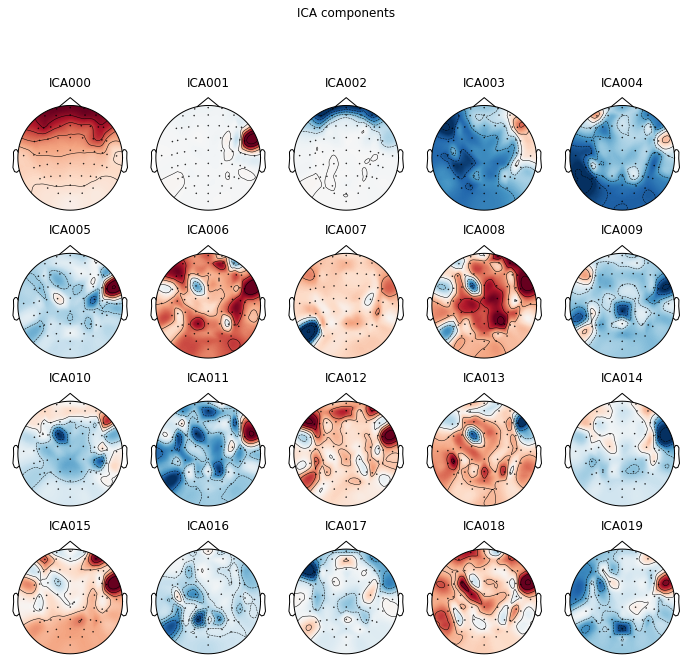

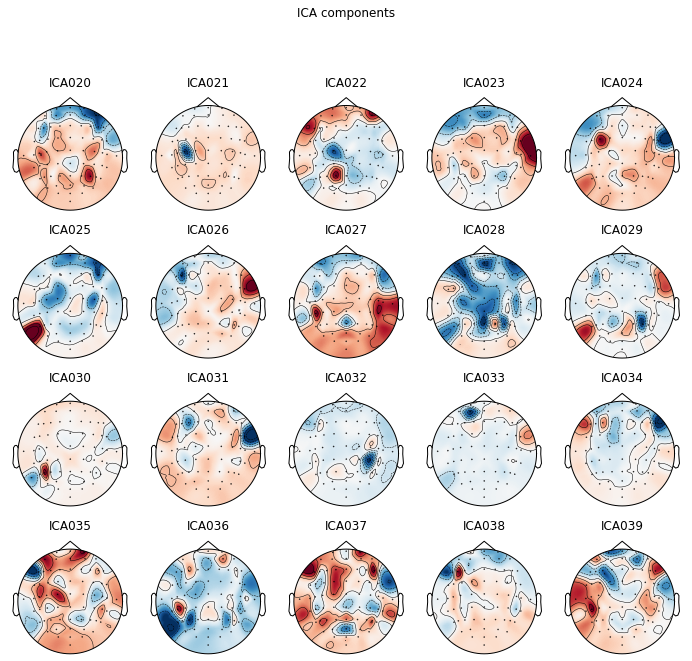

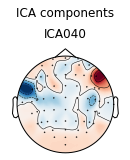

[<Figure size 702x678.24 with 20 Axes>,
 <Figure size 702x678.24 with 20 Axes>,
 <Figure size 140.4x169.56 with 1 Axes>]

In [25]:
ica.plot_components()

In [31]:

for i in range(4,5):


    subject = i
    
    tmin, tmax = -1., 8.
    event_id = dict(hands=2, feet=3)
    
    runs = [3, 7, 11]
    
    
    raw_fnames = eegbci.load_data(subject, runs)
    raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
    raw.rename_channels(lambda x: x.strip('.'))
    raw.rename_channels(lambda x: x.replace('Cp','CP'))
    raw.rename_channels(lambda x: x.replace('Fc','FC'))
    raw.rename_channels(lambda x: x.replace('Af','AF'))
    raw.rename_channels(lambda x: x.replace('Ft','FT'))
    raw.rename_channels(lambda x: x.replace('Tp','TP'))
    raw.rename_channels(lambda x: x.replace('Po','PO'))

    
    montage = make_standard_montage('standard_1005')
    raw.set_montage(montage)
    
    raw.rename_channels(lambda x: x.strip('.'))
    
    
    #raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')
    
    #T1 - left
    #T2 - right
    events, _ = events_from_annotations(raw, event_id=dict(T0=1,T1=2, T2=3))
    
    picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')
    
    
    
    #epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
    #                baseline=None, preload=True)
    
    #raw.save('Standard_dataset/S00'+str(i)+'-raw.fif', overwrite=True)
    
    labels=events_to_array(events,raw)
    #np.savetxt('Standard_dataset/S00'+str(i)+'.csv',labels)

    

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


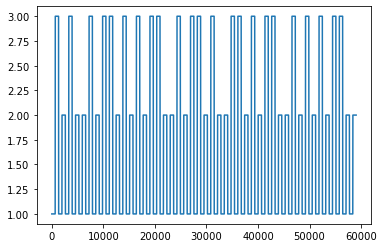

In [128]:
plt.plot(labels)

(array([29520.,     0.,     0.,     0.,     0., 14432.,     0.,     0.,
            0., 15088.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

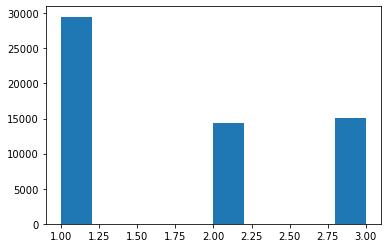

In [129]:
plt.hist(labels)

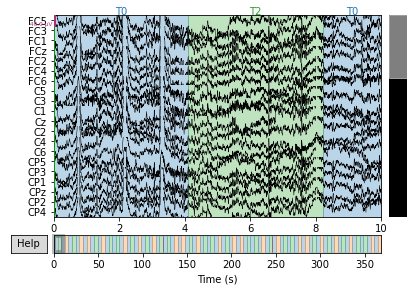

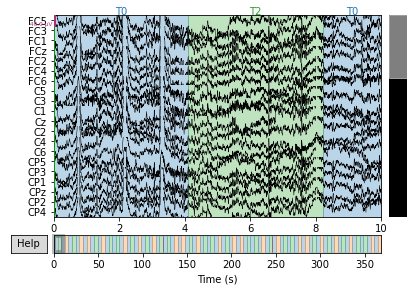

In [125]:
raw.plot()

In [119]:
events[0,0]

656

In [110]:
raw.save('Standard_dataset/S001-raw.fif')


Writing /home/amplifier/common/gurasog/Standard_dataset/S001-raw.fif
Closing /home/amplifier/common/gurasog/Standard_dataset/S001-raw.fif [done]


In [111]:
labels=events_to_array(events,raw)
np.savetxt('Standard_dataset/S001.csv',labels)

In [104]:
raw.get_data().shape

(64, 60000)

In [ ]:
.ipynb_checkpoints/

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

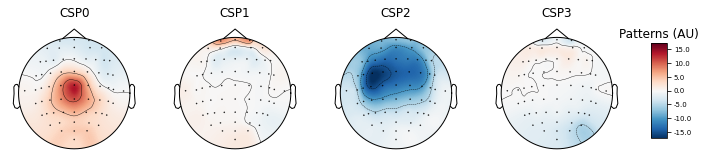


0
[1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0]
[1 0 1 0 1 0 0 1 1 0]

Computing rank from data with rank=None
    Using tolerance 9.8e-05 (2.2e-16 eps * 64 dim * 6.9e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 64 dim * 7.3e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.

1
[1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0]
[1 1 0 0 1 0 1 0 1 1]

Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 64 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data ra

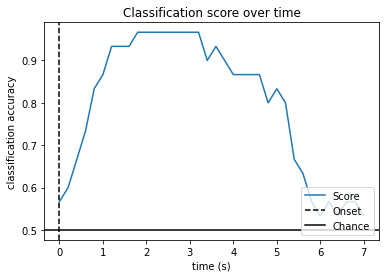

In [36]:
train_idx_s=[np.arange(10,len(epochs)),  np.concatenate([np.arange(0,17),np.arange(27,len(epochs))])   ,np.arange(0,len(epochs)-10)]
test_idx_s=[np.arange(0,10),np.arange(17,27),np.arange(len(epochs)-10,len(epochs))]


for i in range(1,20):


    subject = i
    
    tmin, tmax = -1., 4.
    event_id = dict(hands=2, feet=3)
    
    runs = [5, 9, 13]  # motor imagery: hands vs feet
    
    
    raw_fnames = eegbci.load_data(subject, runs)
    raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
    raw.rename_channels(lambda x: x.strip('.'))
    raw.rename_channels(lambda x: x.replace('Cp','CP'))
    raw.rename_channels(lambda x: x.replace('Fc','FC'))
    raw.rename_channels(lambda x: x.replace('Af','AF'))
    raw.rename_channels(lambda x: x.replace('Ft','FT'))
    raw.rename_channels(lambda x: x.replace('Tp','TP'))
    raw.rename_channels(lambda x: x.replace('Po','PO'))

    
    montage = make_standard_montage('standard_1005')
    raw.set_montage(montage)
    
    raw.rename_channels(lambda x: x.strip('.'))
    
    
    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')
    
    events, _ = events_from_annotations(raw, event_id=dict(T1=2, T2=3))
    
    picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')
    
    
    
    epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True)
    
    epochs_train_tmin=1
    epochs_train_tmax=7
    
    epochs_train = epochs.copy().crop(tmin=1., tmax=2.)
    
    
    
    labels = epochs.events[:, -1] - 2
    
    scores = []
    epochs_data = epochs.get_data()
    epochs_data_train = epochs_train.get_data()
    
    cv = ShuffleSplit(10, test_size=0.2, random_state=42)
    cv_split = cv.split(epochs_data_train)
    
    # Assemble a classifier
    lda = LinearDiscriminantAnalysis()
    csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
    
    # Use scikit-learn Pipeline with cross_val_score function
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)
    
    # Printing the results
    class_balance = np.mean(labels == labels[0])
    class_balance = max(class_balance, 1. - class_balance)
    print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                              class_balance))
    
    # plot CSP patterns estimated on full data for visualization
    csp.fit_transform(epochs_data, labels)
    
    csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5)
    
    
    window=2
    step=0.05
    
    sfreq = raw.info['sfreq']
    w_length = int(sfreq * window)   # running classifier: window length
    w_step = int(sfreq * 0.2)  # running classifier: window step size
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
    
    scores_windows = []
    
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    for tr_ind in range(len(train_idx_s)):
        
        train_idx=train_idx_s[tr_ind]
        test_idx=test_idx_s[tr_ind]
        
        y_train, y_test = labels[train_idx], labels[test_idx]
        print()
        print(tr_ind)
        print(y_train)
        print(y_test)
        print()
        
        X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        X_test = csp.transform(epochs_data_train[test_idx])
    
        # fit classifier
        lda.fit(X_train, y_train)
    
        # running classifier: test classifier on sliding window
        score_this_window = []
        for k in range(len(w_start)):
            n=w_start[k]
            X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_this_window.append(lda.score(X_test, y_test))
            
            one_row=[w_times[k],window,step,'MI_Hands', str(epochs_train_tmin)+' '+str(epochs_train_tmax),lda.score(X_test, y_test)]
            #ind=len(df)
            #df.loc[ind]=one_row

            #print(aaaa)
            
        scores_windows.append(score_this_window)
    
    # Plot scores over time
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    plt.figure()
    plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
    plt.axvline(0, linestyle='--', color='k', label='Onset')
    plt.axhline(0.5, linestyle='-', color='k', label='Chance')
    plt.xlabel('time (s)')
    plt.ylabel('classification accuracy')
    plt.title('Classification score over time')
    plt.legend(loc='lower right')
    plt.show()
    
    #np.save('CSP_results/CSP_results'+str(i), np.array(scores_windows))

    df.iloc

In [38]:
epochs_data[test_idx][:, :, n:(n + w_length)].shape

(10, 64, 320)

# Много измерений

In [153]:
df.loc[len(df)]=[0,1,2,3,4,5,6,7,8]

In [193]:

#train_idx_s=[np.arange(0,len(epochs)-10)]
#test_idx_s=[np.arange(len(epochs)-10,len(epochs))]

df=pd.DataFrame(columns=['time','window','bias','tasks','csp_len','subject','validation_i','acc'])

df=pd.DataFrame(columns=['time','window','bias','tasks','csp_len','subject','validation_i','Y_real','Y_pred'])

windows=[1,2]
bias=[0.05]
tasks=[ 
    
    [3, 7, 11], #Motor execution: left vs right hand
    [4, 8, 12], #Motor imagery: left vs right hand
    [5, 9, 13], #Motor execution: hands vs feet
    [6, 10, 14], #Motor imagery: hands vs feet

]

tain_ranges=[
    
    [0,4],
    #[1,5],
    #[1,7],
    #[0,8]
    
]

scores_subject=[]

for tr in tain_ranges:

    for t in tasks:

        for w in windows:

            for b in bias:

                for i in np.arange(1,4):


                    subject = i

                    tmin, tmax = 0., 8.
                    event_id = dict(hands=2, feet=3)

                    runs = t  # motor imagery: hands vs feet


                    raw_fnames = eegbci.load_data(subject, runs)
                    raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
                    raw.rename_channels(lambda x: x.strip('.'))
                    raw.rename_channels(lambda x: x.replace('Cp','CP'))
                    raw.rename_channels(lambda x: x.replace('Fc','FC'))
                    raw.rename_channels(lambda x: x.replace('Af','AF'))
                    raw.rename_channels(lambda x: x.replace('Ft','FT'))
                    raw.rename_channels(lambda x: x.replace('Tp','TP'))
                    raw.rename_channels(lambda x: x.replace('Po','PO'))


                    montage = make_standard_montage('standard_1005')
                    raw.set_montage(montage)

                    raw.rename_channels(lambda x: x.strip('.'))


                    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

                    events, _ = events_from_annotations(raw, event_id=dict(T1=2, T2=3))

                    picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                                       exclude='bads')



                    epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                                    baseline=None, preload=True)
                    
                    
                    train_idx_s=[np.arange(10,len(epochs)),  np.concatenate([np.arange(0,10),np.arange(20,len(epochs))]),  np.concatenate([np.arange(0,20),np.arange(30,len(epochs))])  ,np.arange(0,len(epochs)-10)]
                    test_idx_s=[np.arange(0,10)           ,  np.arange(10,20)                                           ,  np.arange(20,30)                                             ,np.arange(len(epochs)-10,len(epochs))]

                    
                    train_range=tr
                    epochs_train_tmin=train_range[0]
                    epochs_train_tmax=train_range[1]

                    epochs_train = epochs.copy().crop(tmin=epochs_train_tmin, tmax=epochs_train_tmax)



                    labels = epochs.events[:, -1] - 2

                    scores = []
                    epochs_data = epochs.get_data()
                    epochs_data_train = epochs_train.get_data()

                    # Assemble a classifier
                    #lda = LinearDiscriminantAnalysis()
                    lda = LinearDiscriminantAnalysis()
                    svm= SVC()
                    csp = CSP(n_components=4, log=True, norm_trace=False)
                    
                    # Use scikit-learn Pipeline with cross_val_score function
                    clf = Pipeline([('CSP', csp), ('LDA', lda)])
                    clf = Pipeline([('CSP', csp), ('SVM', svm)])
                    
                    param_grid = { 'CSP__reg': [0.01, 0.1, 0.5, 1, 5, 10]}
                    
                    search = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1,cv=zip(train_idx_s,test_idx_s))
                    
                    
                    window=w
                    step=b

                    sfreq = raw.info['sfreq']
                    w_length = int(sfreq * window)   # running classifier: window length
                    w_step = int(sfreq * step)  # running classifier: window step size
                    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

                    scores_windows = []

                    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
                    
                    
                    
                    search.fit(epochs_data_train, labels)
                    CSP_estimator=search.best_estimator_
                    CSP_estimator.fit(epochs_data_train,labels)
                    
                    scores = []
                    
                    print(i)
                    print(t)
                    ##HERE STARTS TEST##
                    for l in range(4):
                        
                        #epochs_train=epochs[train_idx_s[i]]
                        #epochs_test=epochs[test_idx_s[i]]
                    
                        
                        #epochs_data_train.shape
                        
                        CSP_estimator.fit(epochs_data_train[train_idx_s[l]],labels[train_idx_s[l]])

                        X_test,Y_test,T_test=make_training_set(epochs_data_train[test_idx_s[l]],epochs_train.events[test_idx_s[l]],window_len=w)

                        Y_pred=CSP_estimator.predict(X_test)
                        asa=accuracy_score(Y_test-2,Y_pred)
                        scores.append(asa)
                        
                        for kk in range(len(Y_test)):
                            df.loc[len(df)]=[T_test[kk],w,b,t,0,subject,l,Y_test[kk]-2,Y_pred[kk]]
                    
                    scores_subject.append(scores)
                    
                    

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

In [200]:
kekeke=df[df['window']==2]['Y_real'].values
keke=df[df['window']==2]['Y_pred'].values


accuracy_score(keke.tolist(),kekeke.tolist())
len(keke.tolist())

2880

In [201]:
kekeke=df[df['window']==1]['Y_real'].values
keke=df[df['window']==1]['Y_pred'].values


accuracy_score(keke.tolist(),kekeke.tolist())
len(keke.tolist())

0.6951388888888889

4320

In [203]:
kekeke=df[df['time']==2]['Y_real'].values
keke=df[df['time']==2]['Y_pred'].values


accuracy_score(keke.tolist(),kekeke.tolist())

0.70625

In [204]:
kekeke=df[df['time']==3.5625]['Y_real'].values
keke=df[df['time']==3.5625]['Y_pred'].values


accuracy_score(keke.tolist(),kekeke.tolist())

0.7291666666666666

In [205]:
df

time window  bias        tasks csp_len subject validation_i Y_real  \
0     1.0000      1  0.05   [3, 7, 11]       0       1            0      1   
1     1.3125      1  0.05   [3, 7, 11]       0       1            0      1   
2     1.6250      1  0.05   [3, 7, 11]       0       1            0      1   
3     1.9375      1  0.05   [3, 7, 11]       0       1            0      1   
4     2.2500      1  0.05   [3, 7, 11]       0       1            0      1   
...      ...    ...   ...          ...     ...     ...          ...    ...   
7195  2.3125      2  0.05  [6, 10, 14]       0       3            3      0   
7196  2.6250      2  0.05  [6, 10, 14]       0       3            3      0   
7197  2.9375      2  0.05  [6, 10, 14]       0       3            3      0   
7198  3.2500      2  0.05  [6, 10, 14]       0       3            3      0   
7199  3.5625      2  0.05  [6, 10, 14]       0       3            3      0   

     Y_pred  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
7195      0  
7196      0  
7197      0  
7198      0  
7199      0  

[7200 rows x 9 columns]

In [90]:
np.array(scores_subject).reshape(9,4,4)

array([[[0.88333333, 0.86666667, 0.71666667, 0.86666667],
        [0.68333333, 0.83333333, 0.73333333, 0.75      ],
        [0.96666667, 0.91666667, 0.98333333, 0.9       ],
        [0.85      , 0.88333333, 0.9       , 0.95      ]],

       [[0.78333333, 0.86666667, 0.81666667, 0.8       ],
        [0.5       , 0.65      , 0.7       , 0.71666667],
        [1.        , 0.98333333, 1.        , 0.95      ],
        [0.8       , 0.85      , 0.83333333, 0.96666667]],

       [[1.        , 0.96666667, 0.93333333, 0.93333333],
        [1.        , 0.83333333, 0.91666667, 0.75      ],
        [0.91666667, 0.9       , 0.88333333, 0.95      ],
        [0.76666667, 0.86666667, 0.8       , 0.76666667]],

       [[0.85      , 0.71666667, 0.85      , 0.78333333],
        [0.53333333, 0.63333333, 0.48333333, 0.76666667],
        [0.66666667, 0.71666667, 0.8       , 0.7       ],
        [1.        , 0.91666667, 1.        , 1.        ]],

       [[0.93333333, 0.71666667, 0.85      , 0.58333333],
      

In [135]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [139]:
len(T_test)

60

In [141]:
len(Y_test)

60

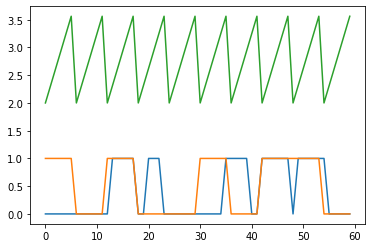

In [143]:
plt.plot(Y_pred)
plt.plot(Y_test-2)
plt.plot(T_test)

In [63]:
accuracy_score?

Signature: accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
Docstring:
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

Read more in the :ref:`User Guide <accuracy_score>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

normalize : bool, optional (default=True)
    If ``False``, return the number of correctly classified samples.
    Otherwise, return the fraction of correctly classified samples.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    If ``normalize == True``, return the fraction of correctly
    classified samples (float), else returns the 

In [24]:
epochs_data_train.shape

(42, 64, 641)

In [45]:
search.best_estimator_.fit(epochs_data_train,labels)

Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 8.1e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using SHRINKAGE
Done.
Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 64 dim * 7.2e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using SHRINKAGE
Done.


Pipeline(steps=[('CSP',
                 CSP(component_order='mutual_info', cov_est='concat', cov_method_params=None,
  log=True, n_components=4, norm_trace=False, rank=None, reg=1,
  transform_into='average_power')),
                ('SVM', SVC())])

In [46]:
epochs_data_train.shape

(42, 64, 641)

In [55]:
a_kek[0].shape

(64, 320)

In [59]:
search.predict(a_kek).shape

(60,)

In [50]:
a_kek=make_training_set(epochs_data_train[test_idx_s[0]],epochs.events)[0]

In [23]:
epochs_data_train[i].shape

(64, 641)

In [25]:
search.predict()

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [192]:
def make_training_set(epochs_data_train,events, concat_flg=True,xy_flg=True, sfreq=160,window_len=2,bias=50):

        if xy_flg:
            X_all=[]
            Y_all=[]
            Times_all=[]
            for i in range(len(epochs_data_train)):
                # Every epoch we devide id into subepochs with a window and bias
                list_of_states_i, train_data_list_i, times_list_i=make_data(epochs_data_train[i],sfreq*window_len,bias,[events[i,2]]*epochs_data_train[i].shape[1],times_list_flg=True)
                # For each epoch it returns 
                # number of indecies of one subepoch to extract signal
                # labels
                # times 
                
                X_=[]

                for state_i in range(len(list_of_states_i)-1):
                    #X_.append(np.mean(epochs_data_train[i][:,train_data_list_i[state_i]],1))
                    X_.append(epochs_data_train[i][:,train_data_list_i[state_i]])
                #print(len(X_))
                
                Times_all.append(times_list_i[:-1])
                #print(Times_all)
                
                X_all.append(X_)
                Y_all.append(list_of_states_i[:-1])
                
            
            Times_all=np.array(Times_all)
            X_all=np.array(X_all)
            Y_all=np.array(Y_all)
            
            if concat_flg:
                X_all=np.concatenate(X_all)
                Y_all=np.concatenate(Y_all)
                Times_all=np.concatenate(Times_all)

            return X_all,Y_all, Times_all

In [117]:
def make_training_set_old(epochs_data_train,events, concat_flg=True,xy_flg=True, sfreq=160,window_len=2,bias=50):

        if xy_flg:
            X_all=[]
            Y_all=[]
            Times_all=[]
            print(Times_all)
            for i in range(len(epochs_data_train)):
                # Every epoch we devide id into subepochs with a window and bias
                list_of_states_i, train_data_list_i=make_data(epochs_data_train[i],sfreq*window_len,bias,[events[i,2]]*epochs_data_train[i].shape[1])
                #print(list_of_states_i)
                X_=[]
                
                for state_i in range(len(list_of_states_i)-1):
                    #X_.append(np.mean(epochs_data_train[i][:,train_data_list_i[state_i]],1))
                    X_.append(epochs_data_train[i][:,train_data_list_i[state_i]])
                #print(len(X_))
                
                Times_all.append(np.linspace(0,4-4/len(list_of_states_i),len(list_of_states_i)))
                print(Times_all)
                
                X_all.append(X_)
                Y_all.append(list_of_states_i[:-1])
                
            
            X_all=np.array(X_all)
            Y_all=np.array(Y_all)
            
            if concat_flg:
                X_all=np.concatenate(X_all)
                Y_all=np.concatenate(Y_all)

            return X_all,Y_all

In [127]:
X_test,Y_test,Times_all=make_training_set(epochs_data_train[test_idx_s[l]],epochs_train.events[test_idx_s[l]])

[2.0]
[2.0, 2.3125]
[2.0, 2.3125, 2.625]
[2.0, 2.3125, 2.625, 2.9375]
[2.0, 2.3125, 2.625, 2.9375, 3.25]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625, 3.875]
[2.0]
[2.0, 2.3125]
[2.0, 2.3125, 2.625]
[2.0, 2.3125, 2.625, 2.9375]
[2.0, 2.3125, 2.625, 2.9375, 3.25]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625, 3.875]
[2.0]
[2.0, 2.3125]
[2.0, 2.3125, 2.625]
[2.0, 2.3125, 2.625, 2.9375]
[2.0, 2.3125, 2.625, 2.9375, 3.25]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625, 3.875]
[2.0]
[2.0, 2.3125]
[2.0, 2.3125, 2.625]
[2.0, 2.3125, 2.625, 2.9375]
[2.0, 2.3125, 2.625, 2.9375, 3.25]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625, 3.875]
[2.0]
[2.0, 2.3125]
[2.0, 2.3125, 2.625]
[2.0, 2.3125, 2.625, 2.9375]
[2.0, 2.3125, 2.625, 2.9375, 3.25]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625]
[2.0, 2.3125, 2.625, 2.9375, 3.25, 3.5625, 3.875]
[2.0]
[2.0

In [130]:
Times_all

array([2.    , 2.3125, 2.625 , 2.9375, 3.25  , 3.5625, 2.    , 2.3125,
       2.625 , 2.9375, 3.25  , 3.5625, 2.    , 2.3125, 2.625 , 2.9375,
       3.25  , 3.5625, 2.    , 2.3125, 2.625 , 2.9375, 3.25  , 3.5625,
       2.    , 2.3125, 2.625 , 2.9375, 3.25  , 3.5625, 2.    , 2.3125,
       2.625 , 2.9375, 3.25  , 3.5625, 2.    , 2.3125, 2.625 , 2.9375,
       3.25  , 3.5625, 2.    , 2.3125, 2.625 , 2.9375, 3.25  , 3.5625,
       2.    , 2.3125, 2.625 , 2.9375, 3.25  , 3.5625, 2.    , 2.3125,
       2.625 , 2.9375, 3.25  , 3.5625])

In [120]:
epochs_data_train[test_idx_s[l]].shape

(10, 64, 641)

In [122]:
len(epochs_train.events[test_idx_s[l]])

10

In [59]:
X_test.shape

(60, 64, 320)

In [191]:
def make_data( raw,window,bias,states,Fs=160,times_list_flg=False):

        try:
        
            time_samples=len(raw['Fz'][0][0])
        
        except :
            
            time_samples=len(np.arange(0,raw.shape[1]*1/Fs,1/Fs))
            
        #print(time_samples)
        list_of_states=[]
        train_data_list=[]
        times_list=[]
        
        for c in np.arange(0,(time_samples-(window-bias)),bias):
                #print(c)
                sum_of_states=sum(states[c:c+window])

                if (sum_of_states%window)==0 and (sum_of_states/window)==states[c]:

                    list_of_states.append(states[c])

                    train_data_list.append(np.arange(c,(c+window)))
                    times_list.append((window+c)/Fs)
                    print(times_list)
                    
        times_list=np.array(times_list)
        
        if times_list_flg:
            
            return list_of_states, train_data_list, times_list
        
        else:
            return list_of_states, train_data_list

In [8]:
search.best_estimator_

Pipeline(steps=[('CSP',
                 CSP(component_order='mutual_info', cov_est='concat', cov_method_params=None,
  log=True, n_components=4, norm_trace=False, rank=None, reg=1,
  transform_into='average_power')),
                ('SVM', SVC())])

In [31]:
search.и

0.8250000000000001

In [36]:
search.best_score_

0.825

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

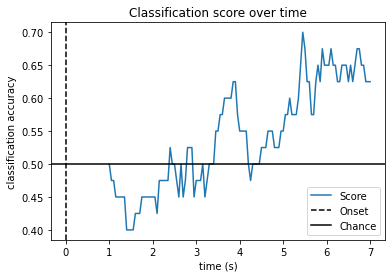

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

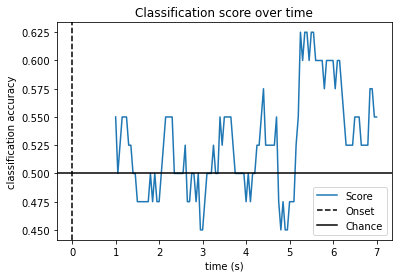


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

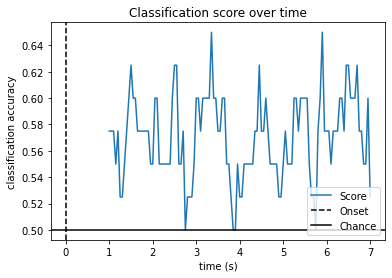


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

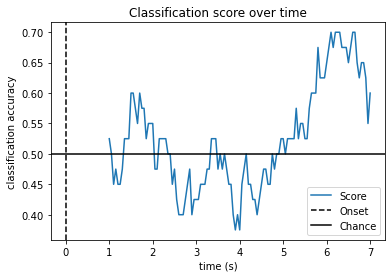

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

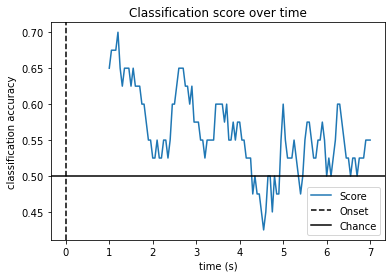

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

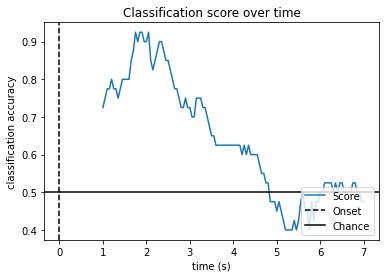


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

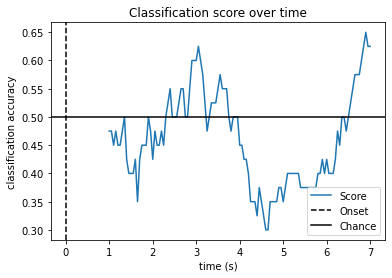


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

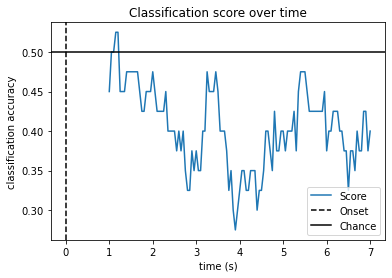

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

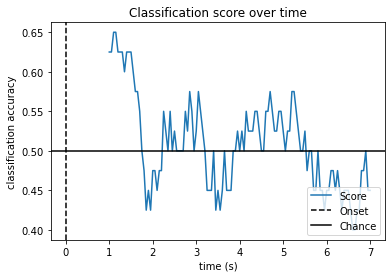

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

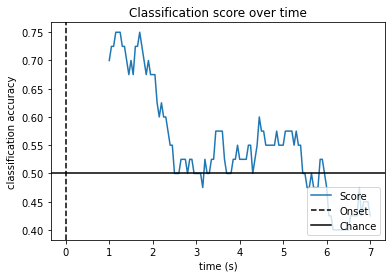


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

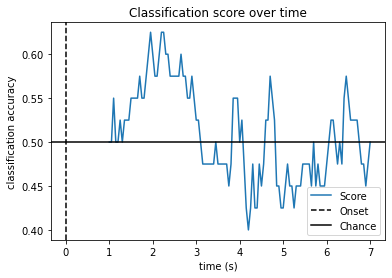


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

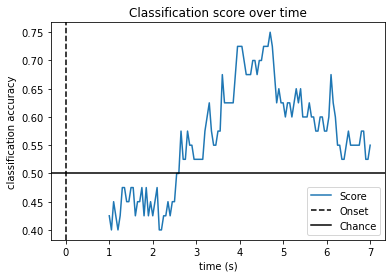

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S019/S019R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

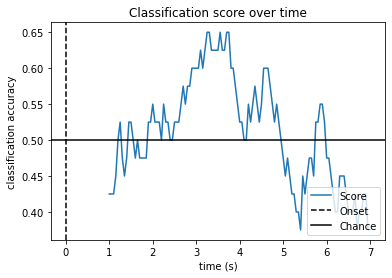

Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S029/S029R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

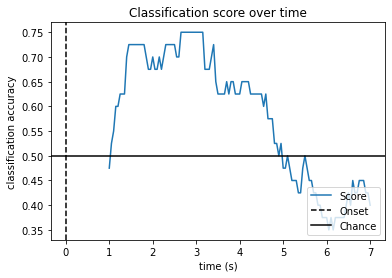


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S039/S039R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

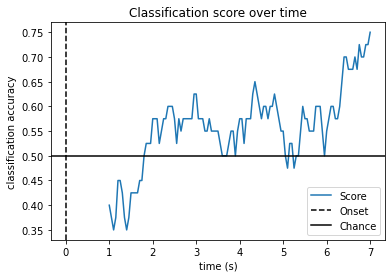


Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/amplifier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S040/S040R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- H

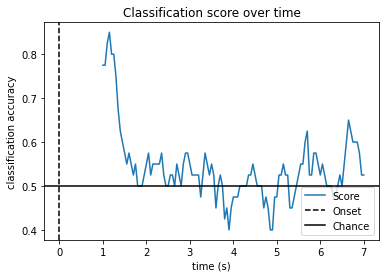

In [20]:

#train_idx_s=[np.arange(0,len(epochs)-10)]
#test_idx_s=[np.arange(len(epochs)-10,len(epochs))]

df=pd.DataFrame(columns=['time','window','bias','tasks','csp_len','subject','validation_i','acc'])
windows=[2]
bias=[0.05]
tasks=[ 
    
    [3, 7, 11], #Motor execution: left vs right hand
    [4, 8, 12], #Motor imagery: left vs right hand
    [5, 9, 13], #Motor execution: hands vs feet
    [6, 10, 14], #Motor imagery: hands vs feet

]

tain_ranges=[
    
    #[1,2],
    #[1,5],
    #[1,7],
    #[0,8]
    
]


for tr in tain_ranges:

    for t in tasks:

        for w in windows:

            for b in bias:

                for i in [19,29,39,40]:


                    subject = i

                    tmin, tmax = 0., 8.
                    event_id = dict(hands=2, feet=3)

                    runs = t  # motor imagery: hands vs feet


                    raw_fnames = eegbci.load_data(subject, runs)
                    raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
                    raw.rename_channels(lambda x: x.strip('.'))
                    raw.rename_channels(lambda x: x.replace('Cp','CP'))
                    raw.rename_channels(lambda x: x.replace('Fc','FC'))
                    raw.rename_channels(lambda x: x.replace('Af','AF'))
                    raw.rename_channels(lambda x: x.replace('Ft','FT'))
                    raw.rename_channels(lambda x: x.replace('Tp','TP'))
                    raw.rename_channels(lambda x: x.replace('Po','PO'))


                    montage = make_standard_montage('standard_1005')
                    raw.set_montage(montage)

                    raw.rename_channels(lambda x: x.strip('.'))


                    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

                    events, _ = events_from_annotations(raw, event_id=dict(T1=2, T2=3))

                    picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                                       exclude='bads')



                    epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                                    baseline=None, preload=True)
                    
                    
                    train_idx_s=[np.arange(10,len(epochs)),  np.concatenate([np.arange(0,10),np.arange(20,len(epochs))]),  np.concatenate([np.arange(0,20),np.arange(30,len(epochs))])  ,np.arange(0,len(epochs)-10)]
                    test_idx_s=[np.arange(0,10)           ,  np.arange(10,20)                                           ,  np.arange(20,30)                                             ,np.arange(len(epochs)-10,len(epochs))]

                    
                    train_range=tr
                    epochs_train_tmin=train_range[0]
                    epochs_train_tmax=train_range[1]

                    epochs_train = epochs.copy().crop(tmin=epochs_train_tmin, tmax=epochs_train_tmax)



                    labels = epochs.events[:, -1] - 2

                    scores = []
                    epochs_data = epochs.get_data()
                    epochs_data_train = epochs_train.get_data()

                    cv = ShuffleSplit(10, test_size=0.2, random_state=42)
                    cv_split = cv.split(epochs_data_train)

                    # Assemble a classifier
                    lda = LinearDiscriminantAnalysis()
                    csp = CSP(n_components=4, reg=0.1, log=True, norm_trace=False)

                    # Use scikit-learn Pipeline with cross_val_score function
                    clf = Pipeline([('CSP', csp), ('LDA', lda)])
                    
                    param_grid = {
                        'reg': [0.01, 0.1, 0.5, 1, 5, 10],
                    }
                    
                    search = GridSearchCV(estimator=clf, param_grid, n_jobs=-1,cv=(train_idx_s,test_idx_s))
                    
                    
                    window=w
                    step=b

                    sfreq = raw.info['sfreq']
                    w_length = int(sfreq * window)   # running classifier: window length
                    w_step = int(sfreq * step)  # running classifier: window step size
                    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

                    scores_windows = []

                    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
                    
                    for tr_ind in range(len(train_idx_s)):

                        train_idx=train_idx_s[tr_ind]
                        test_idx=test_idx_s[tr_ind]
                        
                        y_train, y_test = labels[train_idx], labels[test_idx]

                        X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
                        X_test = csp.transform(epochs_data_train[test_idx])

                        # fit classifier
                        lda.fit(X_train, y_train)

                        # running classifier: test classifier on sliding window
                        score_this_window = []
                        for k in range(len(w_start)):
                            n=w_start[k]
                            X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
                            score_this_window.append(lda.score(X_test, y_test))

                            one_row=[w_times[k],window,step,str(runs), str(epochs_train_tmin)+' '+str(epochs_train_tmax),i,tr_ind,lda.score(X_test, y_test)]
                            ind=len(df)
                            df.loc[ind]=one_row



                        scores_windows.append(score_this_window)

                    # Plot scores over time
                    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin

                    plt.figure()
                    plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
                    plt.axvline(0, linestyle='--', color='k', label='Onset')
                    plt.axhline(0.5, linestyle='-', color='k', label='Chance')
                    plt.xlabel('time (s)')
                    plt.ylabel('classification accuracy')
                    plt.title('Classification score over time')
                    plt.legend(loc='lower right')
                    plt.show()

                    #np.save('CSP_results/CSP_results'+str(i), np.array(scores_windows))

                    
df.to_pickle('Dataframe_for_CSP_best/CSP_best_Dataframe_with_regu_19_29_39_40.pkl')




In [11]:
19,29,39

time window  bias        tasks csp_len subject validation_i  acc
0      1.00      2  0.05   [3, 7, 11]     0 8      10            0  0.5
1      1.05      2  0.05   [3, 7, 11]     0 8      10            0  0.5
2      1.10      2  0.05   [3, 7, 11]     0 8      10            0  0.5
3      1.15      2  0.05   [3, 7, 11]     0 8      10            0  0.5
4      1.20      2  0.05   [3, 7, 11]     0 8      10            0  0.5
...     ...    ...   ...          ...     ...     ...          ...  ...
17419  6.80      2  0.05  [6, 10, 14]     0 8      18            3  0.5
17420  6.85      2  0.05  [6, 10, 14]     0 8      18            3  0.6
17421  6.90      2  0.05  [6, 10, 14]     0 8      18            3  0.5
17422  6.95      2  0.05  [6, 10, 14]     0 8      18            3  0.5
17423  7.00      2  0.05  [6, 10, 14]     0 8      18            3  0.5

[17424 rows x 8 columns]

In [17]:
df_1=pd.read_pickle('Dataframe_for_CSP_best/CSP_best_Dataframe_with_regu_1_9.pkl')

In [10]:
df_2=pd.read_pickle('Dataframe_for_CSP_best/CSP_best_Dataframe_with_regu_10_19.pkl')

In [19]:
df_2

time window  bias        tasks csp_len subject validation_i  acc
0      1.00      2  0.05   [3, 7, 11]     0 8      10            0  0.5
1      1.05      2  0.05   [3, 7, 11]     0 8      10            0  0.5
2      1.10      2  0.05   [3, 7, 11]     0 8      10            0  0.5
3      1.15      2  0.05   [3, 7, 11]     0 8      10            0  0.5
4      1.20      2  0.05   [3, 7, 11]     0 8      10            0  0.5
...     ...    ...   ...          ...     ...     ...          ...  ...
17419  6.80      2  0.05  [6, 10, 14]     0 8      18            3  0.5
17420  6.85      2  0.05  [6, 10, 14]     0 8      18            3  0.6
17421  6.90      2  0.05  [6, 10, 14]     0 8      18            3  0.5
17422  6.95      2  0.05  [6, 10, 14]     0 8      18            3  0.5
17423  7.00      2  0.05  [6, 10, 14]     0 8      18            3  0.5

[17424 rows x 8 columns]

In [13]:
df_3=pd.read_pickle('Dataframe_for_CSP_best/CSP_best_Dataframe_with_regu_20_29.pkl')

In [15]:
df_4=pd.read_pickle('Dataframe_for_CSP_best/CSP_best_Dataframe_with_regu_30_39.pkl')

In [16]:
df_4

time window  bias        tasks csp_len subject validation_i  acc
0      1.00      2  0.05   [3, 7, 11]     0 8      30            0  0.7
1      1.05      2  0.05   [3, 7, 11]     0 8      30            0  0.7
2      1.10      2  0.05   [3, 7, 11]     0 8      30            0  0.7
3      1.15      2  0.05   [3, 7, 11]     0 8      30            0  0.7
4      1.20      2  0.05   [3, 7, 11]     0 8      30            0  0.7
...     ...    ...   ...          ...     ...     ...          ...  ...
17419  6.80      2  0.05  [6, 10, 14]     0 8      38            3  0.5
17420  6.85      2  0.05  [6, 10, 14]     0 8      38            3  0.5
17421  6.90      2  0.05  [6, 10, 14]     0 8      38            3  0.5
17422  6.95      2  0.05  [6, 10, 14]     0 8      38            3  0.5
17423  7.00      2  0.05  [6, 10, 14]     0 8      38            3  0.5

[17424 rows x 8 columns]

In [225]:
df_all[df_all.tasks=='[4, 8, 12]'].groupby(['tasks','subject']).mean().groupby(['tasks','subject']).max()

time  bias       acc
tasks      subject                      
[4, 8, 12] 1         4.0  0.05  0.558884
           2         4.0  0.05  0.545868
           3         4.0  0.05  0.537397
           4         4.0  0.05  0.541736
           5         4.0  0.05  0.456612
           6         4.0  0.05  0.526860
           7         4.0  0.05  0.614050
           8         4.0  0.05  0.522727
           9         4.0  0.05  0.461570
           10        4.0  0.05  0.542562
           11        4.0  0.05  0.502273
           12        4.0  0.05  0.492149
           13        4.0  0.05  0.508058
           14        4.0  0.05  0.587397
           15        4.0  0.05  0.516322
           16        4.0  0.05  0.488017
           17        4.0  0.05  0.507645
           18        4.0  0.05  0.511364

In [222]:
df_all[df_all.tasks=='[5, 9, 13]'].

time window  bias       tasks csp_len subject validation_i  acc
8712   1.00      2  0.05  [5, 9, 13]     0 8       1            0  0.3
8713   1.05      2  0.05  [5, 9, 13]     0 8       1            0  0.4
8714   1.10      2  0.05  [5, 9, 13]     0 8       1            0  0.4
8715   1.15      2  0.05  [5, 9, 13]     0 8       1            0  0.4
8716   1.20      2  0.05  [5, 9, 13]     0 8       1            0  0.4
...     ...    ...   ...         ...     ...     ...          ...  ...
13063  6.80      2  0.05  [5, 9, 13]     0 8      18            3  0.6
13064  6.85      2  0.05  [5, 9, 13]     0 8      18            3  0.6
13065  6.90      2  0.05  [5, 9, 13]     0 8      18            3  0.6
13066  6.95      2  0.05  [5, 9, 13]     0 8      18            3  0.5
13067  7.00      2  0.05  [5, 9, 13]     0 8      18            3  0.5

[8712 rows x 8 columns]

<AxesSubplot:xlabel='time'>

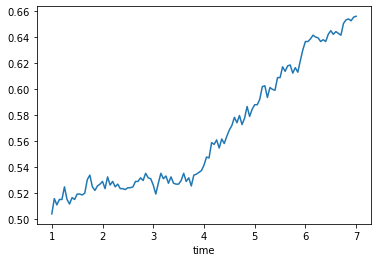

In [210]:
df_all[df_all['tasks']=='[3, 7, 11]'].groupby('time').mean()['acc'].plot()

<AxesSubplot:xlabel='time'>

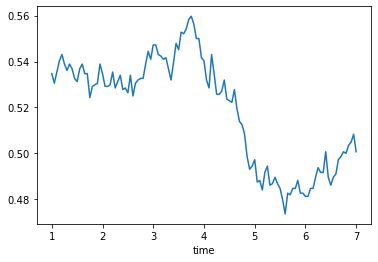

In [212]:
df_all[df_all['tasks']=='[4, 8, 12]'].groupby('time').mean()['acc'].plot()
#df_all[df_all['tasks']=='[4, 8, 12]'].groupby('time').mean()['std'].plot()

In [1]:
df_all[df_all['tasks']=='[5, 9, 13]'].groupby('time').mean()['acc'].plot()

NameError: name 'df_all' is not defined

<AxesSubplot:xlabel='time'>

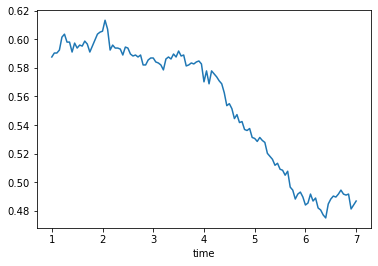

In [209]:
df_all[df_all['tasks']=='[6, 10, 14]'].groupby('time').mean()['acc'].plot()

In [187]:
df_all=df_all[df_all['time']<=4]

In [188]:
df_all[['acc','tasks']].groupby(['tasks']).mean()

acc
tasks                
[3, 7, 11]   0.526161
[4, 8, 12]   0.538058
[5, 9, 13]   0.659267
[6, 10, 14]  0.590893

In [189]:
df_all[['acc','tasks']].groupby(['tasks']).mean()

acc
tasks                
[3, 7, 11]   0.526161
[4, 8, 12]   0.538058
[5, 9, 13]   0.659267
[6, 10, 14]  0.590893

In [160]:
df_all[['acc','validation_i','tasks']].groupby(['validation_i','tasks']).mean()

acc
validation_i tasks                
0            [3, 7, 11]   0.571089
             [4, 8, 12]   0.532327
             [5, 9, 13]   0.628168
             [6, 10, 14]  0.565693
1            [3, 7, 11]   0.582327
             [4, 8, 12]   0.532376
             [5, 9, 13]   0.645198
             [6, 10, 14]  0.548960
2            [3, 7, 11]   0.581040
             [4, 8, 12]   0.504059
             [5, 9, 13]   0.622426
             [6, 10, 14]  0.585842
3            [3, 7, 11]   0.572376
             [4, 8, 12]   0.516683
             [5, 9, 13]   0.629554
             [6, 10, 14]  0.567822

In [190]:
df_all[['acc','subject']].groupby(['subject']).mean()

acc
subject          
1        0.655635
2        0.689344
3        0.564857
4        0.630840
5        0.493750
6        0.532172
7        0.726537
8        0.663422
9        0.497643
10       0.716496
11       0.551844
12       0.562090
13       0.470492
14       0.616291
15       0.612090
16       0.524385
17       0.536066
18       0.506455
20       0.495902
21       0.407377
22       0.717316
23       0.500820
24       0.540266
25       0.502459
26       0.556557
27       0.546209
28       0.565164
30       0.539857
31       0.576537
32       0.652049
33       0.662807
34       0.730943
35       0.700512
36       0.498053
37       0.537705
38       0.548463

In [213]:
df_all[['acc','subject']]

acc subject
0      0.5       1
1      0.5       1
2      0.5       1
3      0.5       1
4      0.5       1
...    ...     ...
17419  0.5      38
17420  0.5      38
17421  0.5      38
17422  0.5      38
17423  0.5      38

[69696 rows x 2 columns]

In [145]:
#df_1_[['subject','acc','tasks',]].groupby(['subject','tasks']).mean()

In [146]:
#df_1_[['subject','acc','time','']].groupby(['subject','time']).mean()

In [147]:
#df_1_[['subject','acc','validation_i','tasks']].groupby(['subject','validation_i','tasks']).mean().head(16)

In [72]:
#df_3_small=df_3[   (df_3['tasks']=='[3, 7, 11]') & (df_3['subject']==10) ]

<AxesSubplot:>

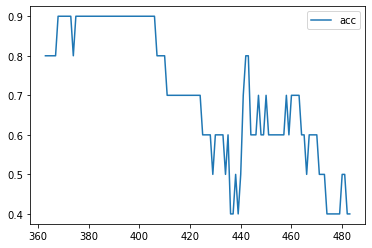

In [93]:
df_3_small[['acc']].tail(121).plot()

<AxesSubplot:xlabel='time'>

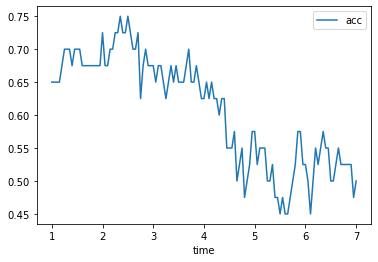

In [82]:
df_3_small[['time','acc']].groupby('time').mean().plot()

In [78]:
df_3_small.acc.ipynb_checkpoints/

0      0.5
1      0.5
2      0.5
3      0.5
4      0.6
      ... 
479    0.4
480    0.5
481    0.5
482    0.4
483    0.4
Name: acc, Length: 484, dtype: float64

# Тестирование значимости 

- ширины окна
- оверлапа
- вида задачи 
- длины обучения 

In [25]:
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
from statsmodels.stats.multitest import multipletests


In [231]:
df_for_stat_test=df_all.copy()


### Анализ time

In [225]:
df_for_stat_test=df_for_stat_test[df_for_stat_test['time']>0]

In [226]:
def round_value(val):
    
    if val>0 and val<=2.25:
        return '0-2'
    
    elif val>2.25 and val<=4:
        return '2-4'
    
    elif val>4 and val<=5.75:
        return '4-6'
    
    elif val>5.75 and val<=8:
        return '6-8'
    
    
    

In [219]:
def round_value(val):
    
    if val>0 and val<=4:
        return '0-4'
    
    elif val>4 and val<=8:
        return '4-8'
    
    
    

In [227]:
df_for_stat_test['time_category']=df_for_stat_test.apply(lambda x: round_value(x[0]), axis=1)

In [228]:
df_for_stat_test.groupby(['time_category']).mean()




time    window      bias       acc
time_category                                        
0-2            1.379474  1.052632  0.116316  0.633318
2-4            3.166842  1.173684  0.112105  0.644690
4-6            4.916489  1.159574  0.110106  0.583128
6-8            6.658791  1.054945  0.113187  0.507958

<AxesSubplot:>

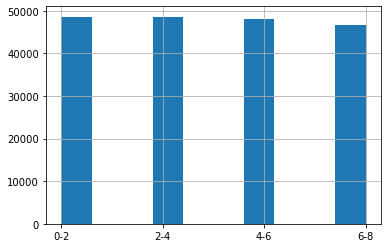

In [229]:
df_for_stat_test['time_category'].hist()

In [183]:
df_for_stat_test

time  window  bias        tasks csp_len subject  acc time_category
0      0.25     0.5  0.05   [3, 7, 11]     1 2       1  0.6           0-4
1      0.30     0.5  0.05   [3, 7, 11]     1 2       1  0.5           0-4
2      0.35     0.5  0.05   [3, 7, 11]     1 2       1  0.6           0-4
3      0.40     0.5  0.05   [3, 7, 11]     1 2       1  0.5           0-4
4      0.45     0.5  0.05   [3, 7, 11]     1 2       1  0.5           0-4
...     ...     ...   ...          ...     ...     ...  ...           ...
47995  5.00     2.0  0.50  [6, 10, 14]     0 8       4  0.3           4-8
47996  5.50     2.0  0.50  [6, 10, 14]     0 8       4  0.4           4-8
47997  6.00     2.0  0.50  [6, 10, 14]     0 8       4  0.5           4-8
47998  6.50     2.0  0.50  [6, 10, 14]     0 8       4  0.5           4-8
47999  7.00     2.0  0.50  [6, 10, 14]     0 8       4  0.4           4-8

[48000 rows x 8 columns]

In [191]:
df_for_stat_test=df_for_stat_test[['window', 'bias', 'tasks', 'csp_len', 'subject', 'acc','time_category']]
df_for_stat_test

window  bias        tasks csp_len subject  acc time_category
0         0.5  0.05   [3, 7, 11]     1 2       1  0.6           0-4
1         0.5  0.05   [3, 7, 11]     1 2       1  0.5           0-4
2         0.5  0.05   [3, 7, 11]     1 2       1  0.6           0-4
3         0.5  0.05   [3, 7, 11]     1 2       1  0.5           0-4
4         0.5  0.05   [3, 7, 11]     1 2       1  0.5           0-4
...       ...   ...          ...     ...     ...  ...           ...
47995     2.0  0.50  [6, 10, 14]     0 8       4  0.3           4-8
47996     2.0  0.50  [6, 10, 14]     0 8       4  0.4           4-8
47997     2.0  0.50  [6, 10, 14]     0 8       4  0.5           4-8
47998     2.0  0.50  [6, 10, 14]     0 8       4  0.5           4-8
47999     2.0  0.50  [6, 10, 14]     0 8       4  0.4           4-8

[48000 rows x 7 columns]

In [230]:
aovrm = AnovaRM(df_for_stat_test, 'acc', 'subject', within=['window', 'bias', 'tasks', 'csp_len', 'time_category'],aggregate_func='mean')
res = aovrm.fit()

print(res)

                                 Anova
                                        F Value  Num DF   Den DF  Pr > F
------------------------------------------------------------------------
window                                  85.3594   2.0000   6.0000 0.0000
bias                                    19.1773   3.0000   9.0000 0.0003
tasks                                    6.7258   3.0000   9.0000 0.0112
csp_len                                  0.7641   3.0000   9.0000 0.5422
time_category                           12.8375   3.0000   9.0000 0.0013
window:bias                              0.7692   6.0000  18.0000 0.6039
window:tasks                             2.2487   6.0000  18.0000 0.0854
bias:tasks                               2.3690   9.0000  27.0000 0.0402
window:csp_len                           0.8570   6.0000  18.0000 0.5440
bias:csp_len                             1.7741   9.0000  27.0000 0.1203
tasks:csp_len                            1.3371   9.0000  27.0000 0.2647
window:time_

In [206]:
df_time_cat=df_for_stat_test[['time_category','acc']]
df_time_cat.groupby(['time_category']).mean()

acc
time_category          
0-2            0.640576
2-4            0.647738
4-6            0.561852
6-8            0.518115

In [232]:
model = ols('acc ~ C(window) + C(bias) + C(tasks) + C(csp_len) +C(subject) +  C(window):C(bias)+ C(window):C(tasks)+ C(window):C(csp_len)+ C(window):C(subject)+  C(bias):C(tasks) +  C(bias):C(csp_len) +   C(bias):C(subject)+ C(tasks):C(csp_len) + C(tasks):C(subject) +C(csp_len):C(subject)+C(window):C(bias):C(tasks)+C(window):C(bias):C(csp_len)+ +C(window):C(bias):C(subject)', data=df_all).fit() 
            
sm.stats.anova_lm(model, typ=2)

sum_sq        df             F  \
C(window)                       38.927577       2.0    688.367925   
C(bias)                          0.208873       3.0      2.462377   
C(tasks)                      1057.888091       3.0  12471.299736   
C(csp_len)                       6.458289       3.0     76.135900   
C(subject)                     266.937671       3.0   3146.892123   
C(window):C(bias)                0.013163       6.0      0.077590   
C(window):C(tasks)               9.160269       6.0     53.994584   
C(window):C(csp_len)             1.087684       6.0      6.411281   
C(window):C(subject)             1.635877       6.0      9.642565   
C(bias):C(tasks)                 0.133809       9.0      0.525821   
C(bias):C(csp_len)               0.021328       9.0      0.083813   
C(bias):C(subject)               0.035491       9.0      0.139465   
C(tasks):C(csp_len)             28.313573       9.0    111.261627   
C(tasks):C(subject)            474.716368       9.0   1865.455702   
C(csp_len):C(subject)           22.164236       9.0     87.097062   
C(window):C(bias):C(tasks)       0.029781      18.0      0.058515   
C(window):C(bias):C(csp_len)     0.021780      18.0      0.042794   
C(window):C(bias):C(subject)     0.027087      18.0      0.053222   
Residual                      5424.695320  191853.0           NaN   

                                     PR(>F)  
C(window)                     1.297634e-298  
C(bias)                        6.053391e-02  
C(tasks)                       0.000000e+00  
C(csp_len)                     3.268336e-49  
C(subject)                     0.000000e+00  
C(window):C(bias)              9.982328e-01  
C(window):C(tasks)             6.799897e-67  
C(window):C(csp_len)           9.114032e-07  
C(window):C(subject)           1.230575e-10  
C(bias):C(tasks)               8.569828e-01  
C(bias):C(csp_len)             9.998253e-01  
C(bias):C(subject)             9.985883e-01  
C(tasks):C(csp_len)           3.177331e-209  
C(tasks):C(subject)            0.000000e+00  
C(csp_len):C(subject)         1.377669e-162  
C(window):C(bias):C(tasks)     1.000000e+00  
C(window):C(bias):C(csp_len)   1.000000e+00  
C(window):C(bias):C(subject)   1.000000e+00  
Residual                                NaN

In [233]:
#df_for_stat_test_gr=df_for_stat_test.groupby(['window','bias','tasks','csp_len','subject']).mean()

In [234]:
#df_for_stat_test.tasks.values

In [235]:
#pip install pingouin

In [236]:
#import pingouin

In [237]:
#pingouin.rm_anova(df_for_stat_test, 'acc',['tasks','bias'],'subject',True)

In [238]:
#aovrm = AnovaRM(df_for_stat_test, 'acc', 'subject', within=['window','bias','tasks','csp_len'],aggregate_func='sum')
#res = aovrm.fit()

#print(res)

### Анализ window

In [239]:
m_comp=pairwise_tukeyhsd(df_for_stat_test['acc'],df_for_stat_test['window'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.5    1.0    0.017 0.001 0.0146 0.0195   True
   0.5    2.0   0.0353 0.001 0.0327 0.0378   True
   1.0    2.0   0.0182 0.001 0.0156 0.0209   True
-------------------------------------------------


In [240]:
df_bias=df[['window','acc']]
df_bias.groupby(['window']).mean()

acc
window          
0.5     0.577039
1.0     0.594075
2.0     0.612301

### Анализ bias

In [241]:

m_comp=pairwise_tukeyhsd(df_for_stat_test['acc'],df_for_stat_test['bias'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  0.05    0.1  -0.0005    0.9 -0.0032 0.0021  False
  0.05   0.25  -0.0018 0.5979 -0.0055  0.002  False
  0.05    0.5   -0.004 0.1603  -0.009  0.001  False
   0.1   0.25  -0.0013 0.8357 -0.0053 0.0028  False
   0.1    0.5  -0.0035  0.309 -0.0087 0.0017  False
  0.25    0.5  -0.0022 0.7298 -0.0081 0.0036  False
---------------------------------------------------


In [242]:
df_bias=df[['bias','acc']]
df_bias.groupby(['bias']).mean()

acc
bias          
0.05  0.593780
0.10  0.593258
0.25  0.591999
0.50  0.589755

### Анализ tasks

In [243]:
m_comp=pairwise_tukeyhsd(df_for_stat_test['acc'],df_for_stat_test['tasks'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj  lower   upper  reject
------------------------------------------------------------
[3, 7, 11]  [4, 8, 12]  -0.0116 0.001 -0.0146 -0.0086   True
[3, 7, 11]  [5, 9, 13]   0.1721 0.001  0.1691  0.1751   True
[3, 7, 11] [6, 10, 14]   0.0193 0.001  0.0163  0.0223   True
[4, 8, 12]  [5, 9, 13]   0.1837 0.001  0.1807  0.1867   True
[4, 8, 12] [6, 10, 14]   0.0309 0.001  0.0279  0.0339   True
[5, 9, 13] [6, 10, 14]  -0.1528 0.001 -0.1558 -0.1498   True
------------------------------------------------------------


In [244]:
df_bias=df[['tasks','acc']]
df_bias.groupby(['tasks']).mean()

acc
tasks                
[3, 7, 11]   0.548225
[4, 8, 12]   0.536669
[5, 9, 13]   0.720335
[6, 10, 14]  0.567560

### Анализ csp_len

In [245]:
m_comp=pairwise_tukeyhsd(df_for_stat_test['acc'],df_for_stat_test['csp_len'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0 8    1 2   0.0043 0.0038   0.001  0.0075   True
   0 8    1 5   0.0158  0.001  0.0125   0.019   True
   0 8    1 7   0.0054  0.001  0.0021  0.0086   True
   1 2    1 5   0.0115  0.001  0.0083  0.0147   True
   1 2    1 7   0.0011 0.8057 -0.0022  0.0043  False
   1 5    1 7  -0.0104  0.001 -0.0137 -0.0072   True
----------------------------------------------------


In [246]:
df_bias=df[['csp_len','acc']]
df_bias.groupby(['csp_len']).mean()

acc
csp_len          
0 8      0.586840
1 2      0.591125
1 5      0.602623
1 7      0.592202

array([-0.75, -0.7 , -0.65, ...,  2.  ,  2.5 ,  3.  ])

<AxesSubplot:>

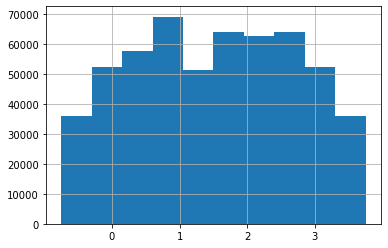

In [193]:
df_all.time.hist()

In [133]:
from sklearn.preprocessing import quantile_transform

In [171]:
a=quantile_transform(np.array(df_all.time.values).reshape(-1, 1),n_quantiles=10,output_distribution='uniform')

In [194]:
col

0        -0.75
1        -0.70
2        -0.65
3        -0.60
4        -0.55
          ... 
136315    1.00
136316    1.50
136317    2.00
136318    2.50
136319    3.00
Name: time, Length: 545280, dtype: float64

In [167]:
df_all

time  window  bias        tasks csp_len subject       acc
0      -0.75     0.5  0.05   [3, 7, 11]     1 2      18  0.222222
1      -0.70     0.5  0.05   [3, 7, 11]     1 2      18  0.444444
2      -0.65     0.5  0.05   [3, 7, 11]     1 2      18  0.444444
3      -0.60     0.5  0.05   [3, 7, 11]     1 2      18  0.555556
4      -0.55     0.5  0.05   [3, 7, 11]     1 2      18  0.555556
...      ...     ...   ...          ...     ...     ...       ...
136315  1.00     2.0  0.50  [6, 10, 14]     0 8      25  0.666667
136316  1.50     2.0  0.50  [6, 10, 14]     0 8      25  1.000000
136317  2.00     2.0  0.50  [6, 10, 14]     0 8      25  0.888889
136318  2.50     2.0  0.50  [6, 10, 14]     0 8      25  0.888889
136319  3.00     2.0  0.50  [6, 10, 14]     0 8      25  0.888889

[545280 rows x 7 columns]

In [247]:
df_bias=df[['bias','acc']]
df_bias.groupby(['bias']).mean()

acc
bias          
0.05  0.593780
0.10  0.593258
0.25  0.591999
0.50  0.589755

In [196]:
df_bias=df[['bias','window','subject','acc','time_category']]

KeyError: "['time_category'] not in index"

In [197]:
df_bias.time_category.hist()


AttributeError: 'DataFrame' object has no attribute 'time_category'

In [172]:
aovrm = AnovaRM(df_bias, 'acc', 'subject', within=['window','bias','time_category'],aggregate_func='mean')
res = aovrm.fit()

print(res)

ValueError: Data is unbalanced.

In [198]:
import collections

<AxesSubplot:>

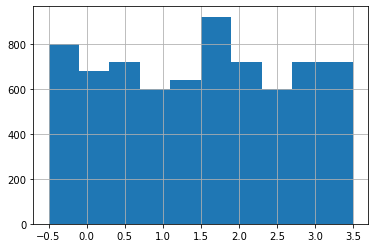

In [168]:
df.time_category.hist()

In [64]:
df_window=df[['window','acc']]
df_window.groupby(['window']).mean()

acc
window          
0.5     0.734783
1.0     0.770609
2.0     0.830260

In [34]:
y_test

array([0, 1, 0, 1, 1, 0, 0, 0, 1])

In [31]:
lda.score(X_test, y_test)

0.3333333333333333

In [190]:
#ind=len(df)
#df.iloc[ind]=one_row


In [50]:
#df.loc[ind]=one_row

In [191]:
#plt.plot(w_times, np.mean(scores_windows, 0), label=i)


In [192]:
#w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
#w_times

In [193]:
#np.mean(scores_windows, 0)

ValueError: x and y must have same first dimension, but have shapes (31,) and (16,)

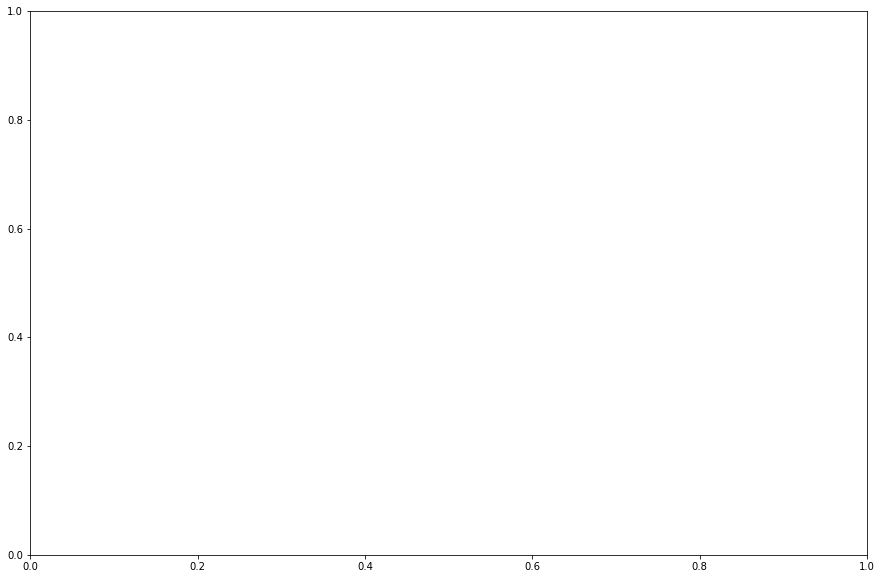

In [175]:
plt.figure(figsize=(15,10))

for i in range(1,20):
    
    scores_windows=np.load('CSP_results/CSP_results'+str(i)+'.npy')
    

    plt.plot(w_times, np.mean(scores_windows, 0), label=i)
    
    
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')

plt.show()

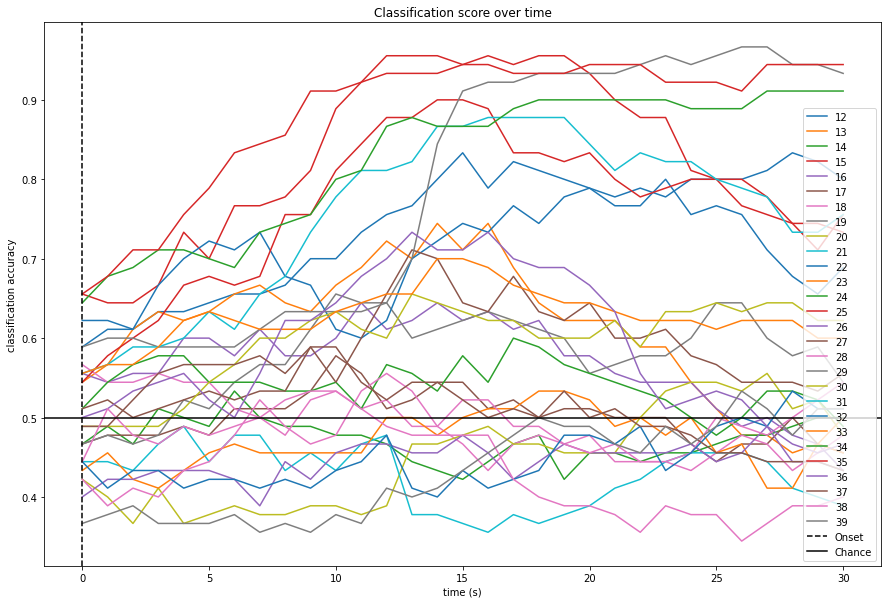

In [200]:
plt.figure(figsize=(15,10))
for i in range(12,40):
    
    scores_windows=np.load('CSP_results/CSP_results'+str(i)+'.npy')
    

    plt.plot(np.mean(scores_windows, 0), label=i)
    
    
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')

plt.show()